In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('../Deeplearning/Datasets/Netflix Userbase.csv')

In [20]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [21]:
df.drop('User ID',axis=1,inplace=True)

In [49]:
df

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,days_subscribed
0,0,10,9,28,1,2,629
1,1,15,2,35,0,3,774
2,2,12,8,42,1,1,119
3,2,12,0,51,0,0,262
4,0,10,4,33,1,2,174
...,...,...,...,...,...,...,...
2495,1,14,7,28,0,1,500
2496,0,15,7,33,0,1,462
2497,2,12,9,38,1,0,310
2498,2,13,2,48,0,3,364


In [23]:
df['Plan Duration'].unique()

array(['1 Month'], dtype=object)

In [24]:
df['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [25]:
df['Join Date']=pd.to_datetime(df['Join Date'])
df['Last Payment Date']=pd.to_datetime(df['Last Payment Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Subscription Type  2500 non-null   object        
 1   Monthly Revenue    2500 non-null   int64         
 2   Join Date          2500 non-null   datetime64[ns]
 3   Last Payment Date  2500 non-null   datetime64[ns]
 4   Country            2500 non-null   object        
 5   Age                2500 non-null   int64         
 6   Gender             2500 non-null   object        
 7   Device             2500 non-null   object        
 8   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 175.9+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['Subscription Type','Country','Gender','Device','Plan Duration']

for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [28]:
df.head(1)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,0,10,2022-01-15,2023-10-06,9,28,1,2,0


In [29]:
df['days_subscribed']=(df['Last Payment Date']-df['Join Date']).dt.days

In [30]:
df['days_subscribed']

0       629
1       774
2       119
3       262
4       174
       ... 
2495    500
2496    462
2497    310
2498    364
2499    481
Name: days_subscribed, Length: 2500, dtype: int64

In [31]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,days_subscribed
0,0,10,2022-01-15,2023-10-06,9,28,1,2,0,629
1,1,15,2021-05-09,2023-06-22,2,35,0,3,0,774
2,2,12,2023-02-28,2023-06-27,8,42,1,1,0,119
3,2,12,2022-10-07,2023-06-26,0,51,0,0,0,262
4,0,10,2023-01-05,2023-06-28,4,33,1,2,0,174


In [32]:
df.drop(['Join Date','Last Payment Date'],axis=1,inplace=True)

In [33]:
df.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,days_subscribed
0,0,10,9,28,1,2,0,629
1,1,15,2,35,0,3,0,774
2,2,12,8,42,1,1,0,119
3,2,12,0,51,0,0,0,262
4,0,10,4,33,1,2,0,174


In [34]:
df.drop('Plan Duration',axis=1,inplace=True)

In [35]:
df.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,days_subscribed
0,0,10,9,28,1,2,629
1,1,15,2,35,0,3,774
2,2,12,8,42,1,1,119
3,2,12,0,51,0,0,262
4,0,10,4,33,1,2,174


In [38]:
X=df.iloc[:,:6]

In [39]:
X

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
0,0,10,9,28,1,2
1,1,15,2,35,0,3
2,2,12,8,42,1,1
3,2,12,0,51,0,0
4,0,10,4,33,1,2
...,...,...,...,...,...,...
2495,1,14,7,28,0,1
2496,0,15,7,33,0,1
2497,2,12,9,38,1,0
2498,2,13,2,48,0,3


In [40]:
Y=df.iloc[:,-1]

In [41]:
Y

0       629
1       774
2       119
3       262
4       174
       ... 
2495    500
2496    462
2497    310
2498    364
2499    481
Name: days_subscribed, Length: 2500, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,ReLU
from tensorflow.keras.layers import MaxPooling2D

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [46]:
model=Sequential()
model.add(Dense(units=4,activation=ReLU()))
model.add(Dense(units=5,activation=ReLU()))
model.add(Dense(units=1,activation='linear'))

In [47]:
model.compile(optimizer='adam',loss=tf.keras.losses.mae,metrics='mae')

In [48]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [50]:
hist=model.fit(X_train,Y_train,epochs=50,validation_split=0.33,batch_size=50)

Epoch 1/50
27/27 [==============================] - 1s 12ms/step - loss: 323.7822 - mae: 323.7821 - val_loss: 324.4940 - val_mae: 324.4940
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 323.4823 - mae: 323.4823 - val_loss: 324.1566 - val_mae: 324.1566
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 323.1270 - mae: 323.1270 - val_loss: 323.7546 - val_mae: 323.7546
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 322.7016 - mae: 322.7016 - val_loss: 323.2712 - val_mae: 323.2712
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 322.1838 - mae: 322.1838 - val_loss: 322.6732 - val_mae: 322.6732
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 321.5361 - mae: 321.5361 - val_loss: 321.9195 - val_mae: 321.9195
Epoch 7/50
27/27 [==============================] - 0s 7ms/step - loss: 320.7211 - mae: 320.7211 - val_loss: 320.9761 - val_mae: 320.9761
Epoch 8/50
27/27 [===============

In [53]:
from sklearn.metrics import mean_absolute_error
predicts=model.predict(X_test)
mae=mean_absolute_error(Y_test,predicts)
mae

16/16 [==============================] - 0s 2ms/step


109.64582968139648

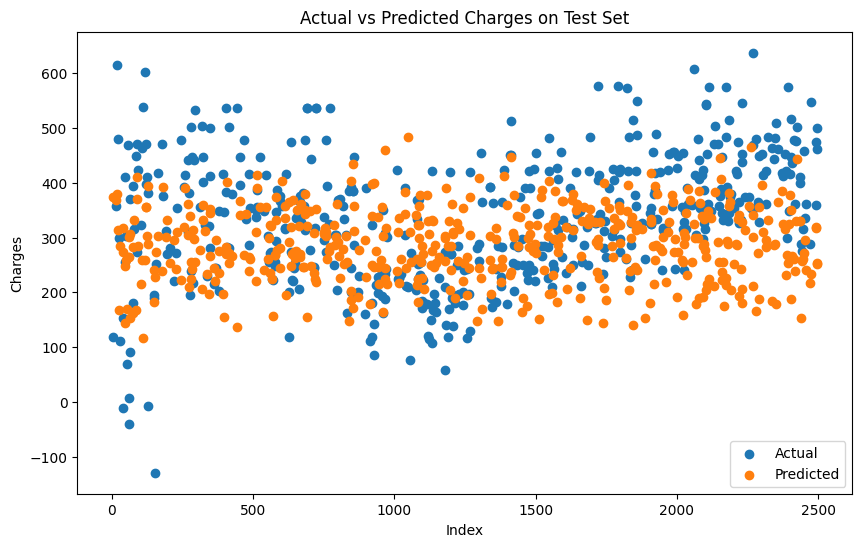

In [54]:
results = pd.DataFrame({"Actual": Y_test, "Predicted": predicts.flatten()})

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results.index, results["Actual"], label="Actual")
plt.scatter(results.index, results["Predicted"], label="Predicted")
plt.xlabel("Index")
plt.ylabel("Charges")
plt.title("Actual vs Predicted Charges on Test Set")
plt.legend()
plt.show()

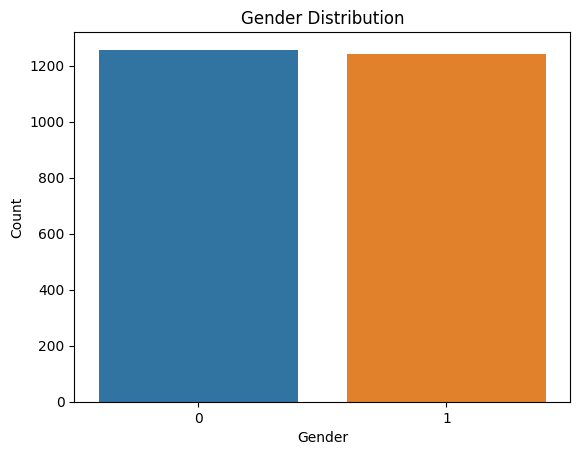

In [55]:
sns.countplot(x='Gender',data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

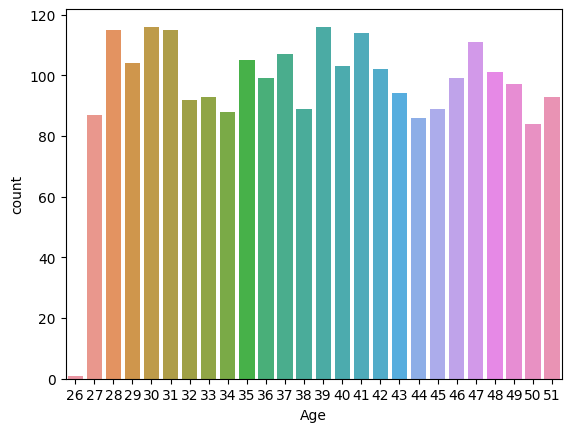

In [56]:
sns.countplot(x='Age',data=df)


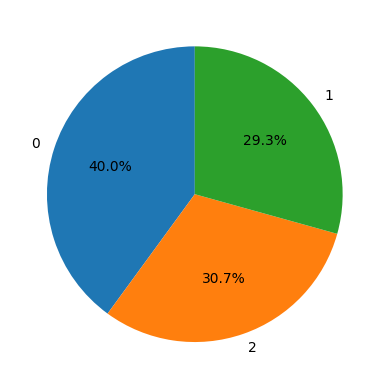

In [57]:
sub_counts=df['Subscription Type'].value_counts()
plt.pie(sub_counts,labels=sub_counts.index,autopct='%1.1f%%',startangle=90)
plt.show()

<Axes: xlabel='Country', ylabel='count'>

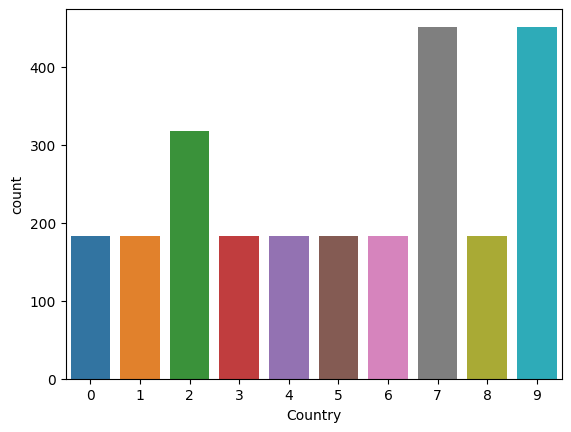

In [58]:
sns.countplot(x='Country',data=df)

<Axes: xlabel='Subscription Type', ylabel='Age'>

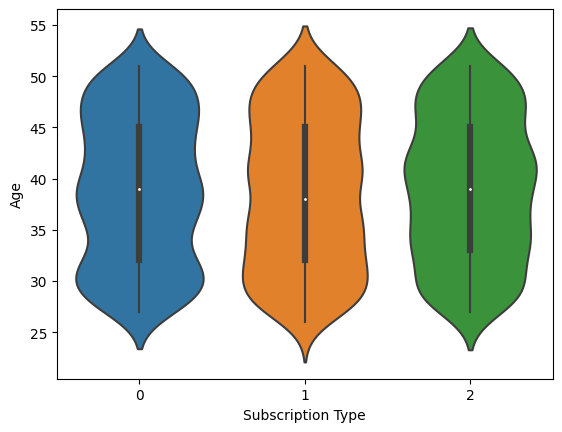

In [59]:
sns.violinplot(x='Subscription Type',y='Age',data=df)

<Axes: xlabel='Device', ylabel='count'>

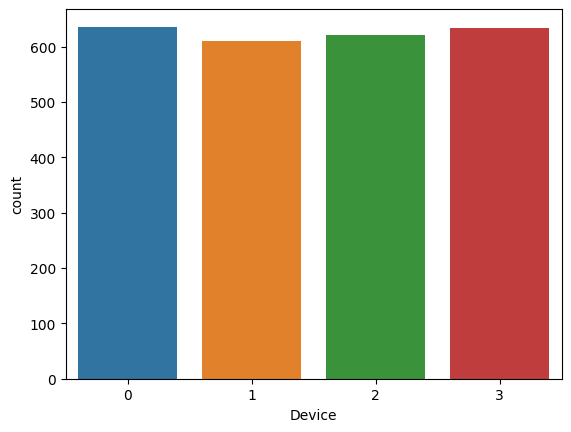

In [60]:
sns.countplot(x='Device',data=df)